In [4]:
import numpy as np
import pandas as pd
import joblib
from lime.lime_tabular import LimeTabularExplainer
from tensorflow.keras.models import load_model


In [5]:
# Load the preprocessed data (X_processed) and model columns
X_processed = np.load("../data/X.npy")  # or the path where you saved it
model_columns = joblib.load("../models/columns.save")  # if you saved feature columns

# Load trained model
model = load_model("../models/nslkdd_dnn_model.h5")


In [6]:

feature_names = model_columns
class_names = ["Normal", "Attack"]

explainer = LimeTabularExplainer(
    training_data=np.array(X_processed),
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)


In [9]:
# Explain the first instance as example
data_row = X_processed[0]

# Prediction function for LIME
predict_fn = lambda x: np.hstack([1 - model.predict(x), model.predict(x)])

explanation = explainer.explain_instance(data_row, predict_fn)

# Display top features as a DataFrame
lime_df = pd.DataFrame(explanation.as_list(), columns=["Feature", "Contribution"])
lime_df





157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Feature,Contribution
0,flag_S1 <= -0.05,0.488023
1,service_urh_i <= -0.01,0.416420
2,service_ntp_u <= -0.03,0.406348
3,service_X11 <= -0.02,0.355788
4,service_domain_u <= -0.27,0.227534
5,flag_S3 <= -0.04,0.178523
6,service_rje <= -0.03,-0.149936
7,service_hostnames <= -0.06,-0.146672
8,service_login <= -0.06,-0.132052
9,service_printer <= -0.02,-0.060205


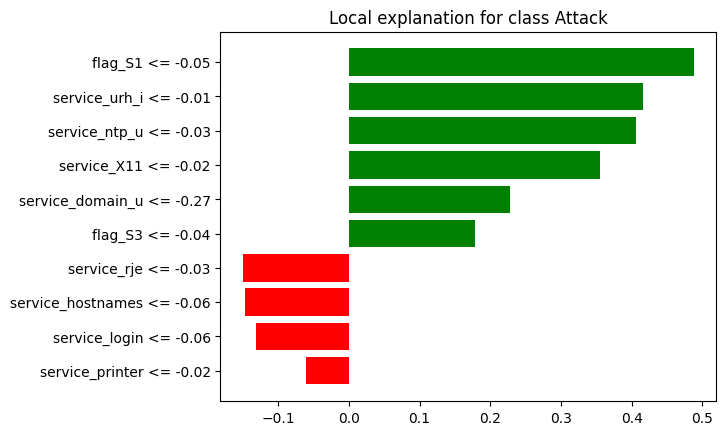

In [14]:
import matplotlib.pyplot as plt

fig = explanation.as_pyplot_figure()
plt.show()
